In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [21]:
raw_data = pd.read_csv('survey lung cancer_PR3.csv')

from sklearn.preprocessing import StandardScaler

In [75]:
raw_data.shape

(309, 15)

In [103]:
raw_data.corr()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
AGE,1.000000,-0.084475,0.005205,0.053170,0.018685,-0.012642,0.012614,0.027990,0.055011,0.058985,0.169950,-0.017513,-0.001270,-0.018104
SMOKING,-0.084475,1.000000,-0.014585,0.160267,-0.042822,-0.141522,-0.029575,0.001913,-0.129426,-0.050623,-0.129471,0.061264,0.030718,0.120117
YELLOW_FINGERS,0.005205,-0.014585,1.000000,0.565829,0.323083,0.041122,-0.118058,-0.144300,-0.078515,-0.289025,-0.012640,-0.105944,0.345904,-0.104829
ANXIETY,0.053170,0.160267,0.565829,1.000000,0.216841,-0.009678,-0.188538,-0.165750,-0.191807,-0.165750,-0.225644,-0.144077,0.489403,-0.113634
PEER_PRESSURE,0.018685,-0.042822,0.323083,0.216841,1.000000,0.048515,0.078148,-0.081800,-0.068771,-0.159973,-0.089019,-0.220175,0.366590,-0.094828
CHRONIC DISEASE,-0.012642,-0.141522,0.041122,-0.009678,0.048515,1.000000,-0.110529,0.106386,-0.049967,0.002150,-0.175287,-0.026459,0.075176,-0.036938
FATIGUE,0.012614,-0.029575,-0.118058,-0.188538,0.078148,-0.110529,1.000000,0.003056,0.141937,-0.191377,0.146856,0.441745,-0.132790,-0.010832
ALLERGY,0.027990,0.001913,-0.144300,-0.165750,-0.081800,0.106386,0.003056,1.000000,0.173867,0.344339,0.189524,-0.030056,-0.061508,0.239433
WHEEZING,0.055011,-0.129426,-0.078515,-0.191807,-0.068771,-0.049967,0.141937,0.173867,1.000000,0.265659,0.374265,0.037834,0.069027,0.147640
ALCOHOL CONSUMING,0.058985,-0.050623,-0.289025,-0.165750,-0.159973,0.002150,-0.191377,0.344339,0.265659,1.000000,0.202720,-0.179416,-0.009294,0.331226


In [22]:
raw_data.tail()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
304,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES
308,62,1,1,1,2,1,2,2,2,2,1,1,2,1,YES


In [24]:
scaler = StandardScaler()
scaler.fit(raw_data.drop('LUNG_CANCER', axis=1))
scaled_features = scaler.transform(raw_data.drop('LUNG_CANCER', axis=1))
scaled_data = pd.DataFrame(scaled_features, columns = raw_data.drop('LUNG_CANCER', axis=1).columns)

In [25]:
from sklearn.model_selection import train_test_split
x = scaled_data
y = raw_data['LUNG_CANCER']
x_training_data,x_test_data, y_training_data,y_test_data = train_test_split(x, y, test_size = 0.3)

In [26]:
#Train the model and make predictions

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 1)

model.fit(x_training_data, y_training_data)

predictions = model.predict(x_test_data)

In [27]:
predictions

array(['YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'NO', 'NO',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO', 'NO', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'NO', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES'],
      dtype=object)

In [28]:
#Performance measurement

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

print(classification_report(y_test_data, predictions))

print(confusion_matrix(y_test_data, predictions))

              precision    recall  f1-score   support

          NO       0.55      0.60      0.57        10
         YES       0.95      0.94      0.95        83

    accuracy                           0.90        93
   macro avg       0.75      0.77      0.76        93
weighted avg       0.91      0.90      0.91        93

[[ 6  4]
 [ 5 78]]


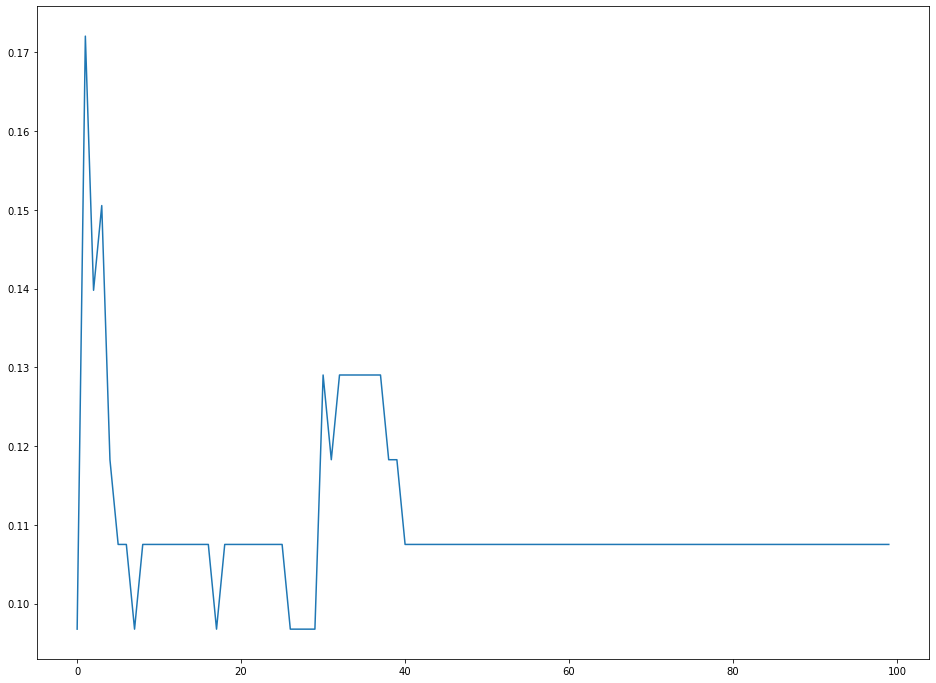

In [29]:

error_rates = []

for i in np.arange(1, 101):

    new_model = KNeighborsClassifier(n_neighbors = i)

    new_model.fit(x_training_data, y_training_data)

    new_predictions = new_model.predict(x_test_data)

    error_rates.append(np.mean(new_predictions != y_test_data))

plt.figure(figsize=(16,12))

plt.plot(error_rates)

## Taking K = 6

In [64]:


from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 6)

model.fit(x_training_data, y_training_data)

predictions = model.predict(x_test_data)

In [65]:
#Performance measurement

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

print(classification_report(y_test_data, predictions))

print(confusion_matrix(y_test_data, predictions))

              precision    recall  f1-score   support

          NO       0.50      0.60      0.55        10
         YES       0.95      0.93      0.94        83

    accuracy                           0.89        93
   macro avg       0.73      0.76      0.74        93
weighted avg       0.90      0.89      0.90        93

[[ 6  4]
 [ 6 77]]


## Taking K=8

In [67]:

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 8)

model.fit(x_training_data, y_training_data)

predictions = model.predict(x_test_data)

#Performance measurement

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

print(classification_report(y_test_data, predictions))

print(confusion_matrix(y_test_data, predictions))

              precision    recall  f1-score   support

          NO       0.55      0.60      0.57        10
         YES       0.95      0.94      0.95        83

    accuracy                           0.90        93
   macro avg       0.75      0.77      0.76        93
weighted avg       0.91      0.90      0.91        93

[[ 6  4]
 [ 5 78]]


## Taking K = 10

In [69]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 10)

model.fit(x_training_data, y_training_data)

predictions = model.predict(x_test_data)

#Performance measurement

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

print(classification_report(y_test_data, predictions))

print(confusion_matrix(y_test_data, predictions))

              precision    recall  f1-score   support

          NO       0.50      0.50      0.50        10
         YES       0.94      0.94      0.94        83

    accuracy                           0.89        93
   macro avg       0.72      0.72      0.72        93
weighted avg       0.89      0.89      0.89        93

[[ 5  5]
 [ 5 78]]


# Question and Answer


#### 1.   Why you want to apply classification on selected dataset? Discuss full story behind dataset.

A.   Here in case of this particular dataset, classification would be the best approach to classify wether a person is suffering from lung cancer or not. It can be justified from the fact that the target value depends upon many other factors from the output could be concluded.

#### 2.  How many total observations in data?

A.  There are total 309 rows and 15 columns.

#### 3.  How many independent variables?

A.  There are 14 independent variables.

#### 4.  Which is dependent variable?

A.  The Target variable 'LUNG_CANCER' is the dependent variable.

#### 5.  Which are most useful variable in classification? Prove using correlation.

A.  SWALLOWING_DIFFICULTY and ANXITEY are the most important variable here as they have a correlation coefficient of 0.489403.

#### 6.  Quantify goodness of your model and discuss steps taken for improvement.

A.  The KNN algorithm can compete with the most accurate models because it makes highly accurate predictions. Therefore, we can use the KNN algorithm for applications that require high accuracy but that do not require a human-readable model. The quality of the predictions depends on the distance measure

#### 7.  Can we use KNN for regression also? Why / Why not?

A.  Yes, we can use KNN for regression. A simple implementation of KNN regression is to calculate the average of the numerical target of the K nearest neighbors.  Another approach uses an inverse distance weighted average of the K nearest neighbors. KNN regression uses the same distance functions as KNN classification.

#### 8.  Discuss drawbacks of algorithms such as KNN.

A.  Some Disadvantages of KNN
    i.   Accuracy depends on the quality of the data.
    ii.  With large data, the prediction stage might be slow.
    iii. Sensitive to the scale of the data and irrelevant features.
    iv.  Require high memory – need to store all of the training data.
    v.   Given that it stores all of the training, it can be computationally expensive.